1)
-Standard deviation captures the spread of the data itself (how much individual data points deviate from the mean).
-Standard error of the mean captures the precision of the sample mean as an estimate of the population mean (how much sample means would vary if we resample).

2)
To create a 95% confidence interval using the standard error of the mean (SEM), you can follow these steps:

Calculate the sample mean: First, compute the mean of your sample data.
Find the standard error of the mean (SEM): Calculate the SEM, which is the standard deviation of the sample data divided by the square root of the sample size (
SEMSD).
SEM= SD/sqrt(n)
Multiply SEM by 1.96: For a 95% confidence interval, multiply the SEM by 1.96 (which corresponds to the critical value from the standard normal distribution for 95% confidence).
Add and subtract from the mean: To create the confidence interval, add and subtract 
1.96
×
SEM
1.96×SEM from the sample mean. This gives the range where we expect 95% of the sample means to lie if we took multiple samples from the population.
The formula for the 95% confidence interval is:

CI
(Sample Mean−1.96×SEM,Sample Mean+1.96×SEM)
CI=(Sample Mean−1.96×SEM, Sample Mean+1.96×SEM)
This interval should cover approximately 95% of bootstrapped sample means.

3)
To create a 95% bootstrapped confidence interval using the bootstrapped means, follow this process:

Generate bootstrapped samples: Create a large number of bootstrapped samples (usually 1000 or more) by randomly sampling from your original dataset with replacement. Each bootstrapped sample should be the same size as the original sample.
Calculate the mean for each bootstrapped sample: For each bootstrapped sample, calculate the sample mean. This gives you a distribution of bootstrapped sample means.
Use quantiles to find the confidence interval: To create the 95% confidence interval, sort the bootstrapped means and then find the 2.5th percentile and the 97.5th percentile using np.quantile(...). These percentiles represent the lower and upper bounds of the 95% confidence interval, covering exactly 95% of the bootstrapped sample means.
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)
Interpret the interval: The resulting interval, from the 2.5th to the 97.5th percentile, gives you the range within which the true population mean is expected to lie with 95% confidence.

In [ ]:
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)

Interpret the interval: The resulting interval, from the 2.5th to the 97.5th percentile, gives you the range within which the true population mean is expected to lie with 95% confidence.

In [ ]:
#4)
import numpy as np

# Sample data (replace this with your actual sample)
data = np.array([10, 12, 14, 15, 17, 18, 20, 22, 23, 25])

# Function to generate bootstrap samples and compute 95% confidence interval
def bootstrap_ci(data, num_samples=1000, stat_func=np.mean, ci=0.95):
    bootstrapped_stats = []
    
    # Generate bootstrap samples and compute the statistic for each sample
    for _ in range(num_samples):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        boot_stat = stat_func(boot_sample)  # Calculate the statistic (mean, median, etc.)
        bootstrapped_stats.append(boot_stat)
    
    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = np.quantile(bootstrapped_stats, (1 - ci) / 2)
    upper_bound = np.quantile(bootstrapped_stats, 1 - (1 - ci) / 2)
    
    return lower_bound, upper_bound

# Generate 95% CI for the population mean (default statistic is np.mean)
mean_ci = bootstrap_ci(data)
print(f"95% bootstrap CI for the mean: {mean_ci}")

# Change the function to np.median to generate 95% CI for the population median
median_ci = bootstrap_ci(data, stat_func=np.median)
print(f"95% bootstrap CI for the median: {median_ci}")

POST LECTURE

5)
Population parameter: This is a fixed, true value that describes a characteristic of the entire population (like the population mean, median, or proportion). It's typically unknown because we can’t measure the entire population.
Sample statistic: This is a value calculated from a sample drawn from the population (like the sample mean or median). It’s used as an estimate of the population parameter. Since it’s based on the sample, the statistic can vary depending on the sample taken.
A confidence interval gives us a range of values for the population parameter based on the observed sample statistic. The key point is that the sample statistic is used to estimate the population parameter, but because the sample can vary, the confidence interval accounts for uncertainty by providing a range of plausible values for the unknown population parameter.



6)
What is the process of bootstrapping?

Bootstrapping is a way to estimate the uncertainty or variability of a statistic (like the mean or median) when you only have a small sample of data. The idea is that, since you can't take more samples from the population, you instead create new samples by randomly picking data points from your existing sample with replacement. This means that when you create each new sample, you're allowed to pick the same data points multiple times. Then, for each new sample, you calculate whatever statistic you're interested in (e.g., the mean). By repeating this process many times, you end up with a bunch of results that give you a sense of how much your statistic might vary.

What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to understand how much a statistic (like a mean or median) might change if we had taken different samples. Since we usually only have one sample from a population, bootstrapping helps us estimate the range of possible values for the true population statistic and gives us more confidence in how reliable our sample is. It’s like saying, "If I could take lots of different samples, what would the results look like?"

If you had a guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your guess might be plausible?

Let’s say you think the average of a population is 50, but you don’t know for sure. You could take a sample of size n from that population and then use bootstrapping to create many new samples (by repeatedly picking data points from your sample, with replacement). For each new sample, you calculate the mean and see how the distribution of those bootstrapped means looks.

Now, if the range of these bootstrapped means (called the confidence interval) includes your guess of 50, it means your hypothesized guess could be plausible. But, if 50 falls outside the range of most of your bootstrapped means, it suggests your guess might not be accurate.



7)
When a confidence interval for a sample statistic includes zero, we say we "fail to reject the null hypothesis" because it indicates that zero is a plausible value for the true population parameter (like the effect of a drug). In the context of a hypothesis test, the null hypothesis (H₀) typically states that there is no effect or no difference—in this case, that the drug has no effect on average (i.e., the population mean is 0).

Here’s why: Even though the observed sample mean might not be exactly zero, the confidence interval captures the range of values where we believe the true population mean could lie, considering the uncertainty and variability in our data. If zero falls within this interval, it suggests that the observed difference could be due to random chance rather than a true effect. Therefore, we don't have strong enough evidence to reject the null hypothesis that there’s no effect on average.

On the other hand, if the confidence interval does not include zero, it suggests that zero is not a plausible value for the population mean. This would imply that the true effect is likely not zero, giving us evidence to "reject the null hypothesis" and conclude that the drug probably has some effect.

8)
The Null Hypothesis (H₀) in this context suggests that there is no effect of the vaccine on patients' health. Specifically, this means the average change in health score (Final - Initial) is zero. The Alternative Hypothesis (H₁) would suggest that the vaccine has an effect, meaning there is a significant difference between the initial and final health scores.

In [14]:
import pandas as pd

# Create the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('vaccine_data.csv', index=False)


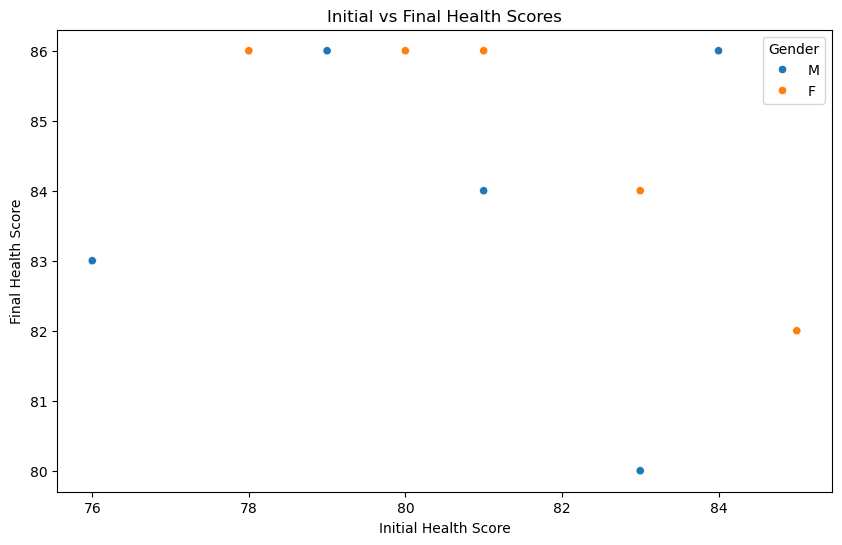

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('vaccine_data.csv')

# Plot initial vs final health scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='InitialHealthScore', y='FinalHealthScore', hue='Gender', data=data)
plt.title('Initial vs Final Health Scores')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.show()


We will use bootstrapping to estimate the distribution of the average difference between the final and initial health scores, and generate a 95% confidence interval to assess whether the vaccine has an effect.

In [16]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Calculate the difference in health scores
data['HealthScoreDiff'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping
n_iterations = 1000
n_size = len(data)
means = []

for _ in range(n_iterations):
    sample = data.sample(n=n_size, replace=True)
    sample_mean = sample['HealthScoreDiff'].mean()
    means.append(sample_mean)

# Calculate 95% confidence interval
ci_lower = np.percentile(means, 2.5)
ci_upper = np.percentile(means, 97.5)

print(f'95% Confidence Interval: {ci_lower:.2f} to {ci_upper:.2f}')


95% Confidence Interval: 0.70 to 5.50


HealthScoreChange: This is the difference between the final and initial health scores.
Bootstrap: We resample the differences with replacement 1000 times to simulate multiple experiments and then compute a 95% confidence interval for the average change in health scores.
Findings and Discussion
Mean Health Score Change: This value represents the average effect of the vaccine across all patients. If this value is positive, it suggests an improvement in health due to the vaccine.
Confidence Interval: The 95% confidence interval provides a range of plausible values for the true mean change. If the interval does not include zero, it suggests that the vaccine likely has a significant effect.
Conclusion Regarding the Null Hypothesis
If the 95% confidence interval includes zero, we fail to reject the null hypothesis, meaning the data does not provide sufficient evidence that the vaccine has a significant effect. On the other hand, if the interval excludes zero, we can reject the null hypothesis and conclude that the vaccine likely has a positive impact on health.

9)
yes